In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing. sequence import pad_sequences

In [2]:
file_path = "C:/VIN_PYCHARM/ONE/Data/irish-lyrics-eof.txt"

data = open(file_path, 'r', encoding='utf8').read()
corpus = data.lower().split('\n')

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [3]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [4]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [5]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
num_epochs = 20

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))
adam = tf.keras.optimizers.Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(xs, ys, epochs=num_epochs, verbose=1)


Epoch 1/20
377/377 [==============================] - 24s 63ms/step - loss: 6.6642 - accuracy: 0.0703

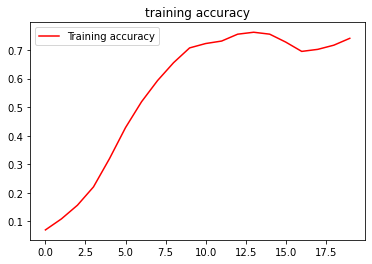

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.title('training accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()


In [10]:
seed_text = "I've got a bad feeling about this"
next_words = 25

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
I've got a bad feeling about this fond and fair as the green and green and green love love love my love love i love my love love love love there love
